pour verifier le process de transformer dicom image à float avec 0,1 interval
code à modier:
data/unaligned_dataset.py : 
     dsA=pydicom.dcmread(A_path)
     array_buffer=dsA.pixel_array.tobytes()
     A_img=Image.frombytes("F",dsA.pixel_array.shape,array_buffer,'raw',"F;16")
     
data/base_dataset.py:
   def get_transform(opt, params=None, grayscale=False, method=Image.BICUBIC, convert=True):
    transform_list = []
    if grayscale:
        transform_list.append(transforms.Grayscale(1))
    if 'resize' in opt.preprocess:
        osize = [opt.load_size, opt.load_size]
        transform_list.append(transforms.Resize(osize, method))
    elif 'scale_width' in opt.preprocess:
        transform_list.append(transforms.Lambda(lambda img: __scale_width(img, opt.load_size, method)))

    if 'crop' in opt.preprocess:
        if params is None:
            transform_list.append(transforms.RandomCrop(opt.crop_size))
        else:
            transform_list.append(transforms.Lambda(lambda img: __crop(img, params['crop_pos'], opt.crop_size)))

    if opt.preprocess == 'none':
        transform_list.append(transforms.Lambda(lambda img: __make_power_2(img, base=4, method=method)))

    if not opt.no_flip:
        if params is None:
            transform_list.append(transforms.RandomHorizontalFlip())
        elif params['flip']:
            transform_list.append(transforms.Lambda(lambda img: __flip(img, params['flip'])))

    if convert:
        transform_list += [transforms.ToTensor()]
        if grayscale:
            transform_list += [transforms.Normalize((0.5,), (0.5,))]
        else:
            transform_list += [transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    return transforms.Compose(transform_list)

In [6]:
import pydicom 
import numpy as np
import torchvision.transforms as transforms
import PIL.Image as Image
import matplotlib.pyplot as plt

In [10]:
ds=pydicom.dcmread('./imgs/ctTest.dcm')
array_buffer=ds.pixel_array.tobytes()
A_img=Image.frombytes("F",ds.pixel_array.shape,array_buffer,'raw',"F;16")

In [24]:
nds=np.array(ds.pixel_array,dtype=np.float64)
nds=(nds+1000)/5000

(array([ 55772.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 119318.,   5210.,
          1155.,    996.,    981.,   1075.,   1037.,   1118.,   1170.,
         11809.,  37991.,   7883.,   3963.,   1612.,    895.,    779.,
           793.,    736.,    641.,    582.,    593.,    577.,    522.,
           523.,    547.,    603.,    745.,    754.,    874.,    751.,
           139.]),
 array([0.      , 0.020824, 0.041648, 0.062472, 0.083296, 0.10412 ,
        0.124944, 0.145768, 0.166592, 0.187416, 0.20824 , 0.229064,
        0.249888, 0.270712, 0.291536, 0.31236 , 0.333184, 0.354008,
        0.374832, 0.395656, 0.41648 , 0.437304, 0.458128, 0.478952,
        0.499776, 0.5206  , 0.541424, 0.562248, 0.583072, 0.603896,
        0.62472 , 0.645544, 0.666368, 0.687192, 0.708016, 0.72884 ,
        0.749664, 0.770488, 0.791312, 0.812136, 0.83296 , 0.853784,
        

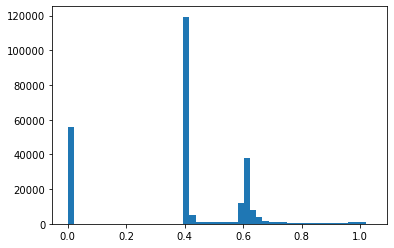

In [26]:
plt.hist(nds.flatten(),bins=50)

In [27]:
nds=nds*5000-1000

(array([ 55772.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 119318.,   5210.,
          1155.,    996.,    981.,   1075.,   1037.,   1118.,   1170.,
         11809.,  37991.,   7883.,   3963.,   1612.,    895.,    779.,
           793.,    736.,    641.,    582.,    593.,    577.,    522.,
           523.,    547.,    603.,    745.,    754.,    874.,    751.,
           139.]),
 array([-1000.  ,  -895.88,  -791.76,  -687.64,  -583.52,  -479.4 ,
         -375.28,  -271.16,  -167.04,   -62.92,    41.2 ,   145.32,
          249.44,   353.56,   457.68,   561.8 ,   665.92,   770.04,
          874.16,   978.28,  1082.4 ,  1186.52,  1290.64,  1394.76,
         1498.88,  1603.  ,  1707.12,  1811.24,  1915.36,  2019.48,
         2123.6 ,  2227.72,  2331.84,  2435.96,  2540.08,  2644.2 ,
         2748.32,  2852.44,  2956.56,  3060.68,  3164.8 ,  3268.92,
        

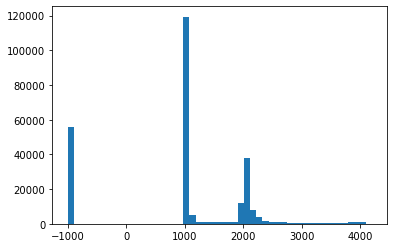

In [28]:
plt.hist(nds.flatten(),bins=50)

(array([191472.,  10816.,   4084.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
         55772.]),
 array([    0.  ,  1270.72,  2541.44,  3812.16,  5082.88,  6353.6 ,
         7624.32,  8895.04, 10165.76, 11436.48, 12707.2 , 13977.92,
        15248.64, 16519.36, 17790.08, 19060.8 , 20331.52, 21602.24,
        22872.96, 24143.68, 25414.4 , 26685.12, 27955.84, 29226.56,
        30497.28, 31768.  , 33038.72, 34309.44, 35580.16, 36850.88,
        38121.6 , 39392.32, 40663.04, 41933.76, 43204.48, 44475.2 ,
        45745.92, 47016.64, 48287.36, 49558.08, 50828.8 , 52099.52,
        

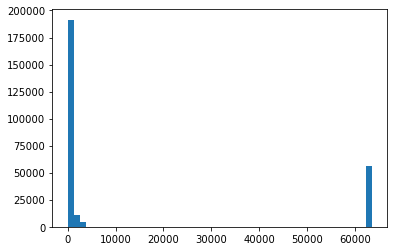

In [15]:
plt.hist(px.flatten(),bins=50)

In [29]:
ndcm=np.load('postGan.npy')

In [30]:
ndcm.shape

(1, 512, 512)

(array([83807.,  5544., 25195., 52020., 16609.,  5252.,  3459.,  3215.,
         2858.,  2561.,  2358.,  1978.,  1777.,  1521.,  1373.,  1192.,
         1007.,   900.,   820.,   712.,   683.,   548.,   577.,   669.,
          858.,  1156.,  1419.,  1503.,  1569.,  1566.,  1453.,  1210.,
          983.,   768.,   678.,   626.,   562.,   530.,   443.,   510.,
          510.,   542.,   515.,   569.,   585.,   602.,   664.,   740.,
          885., 24063.]),
 array([-1.99672742e+03, -1.89679370e+03, -1.79685986e+03, -1.69692615e+03,
        -1.59699243e+03, -1.49705859e+03, -1.39712488e+03, -1.29719116e+03,
        -1.19725732e+03, -1.09732361e+03, -9.97389832e+02, -8.97456116e+02,
        -7.97522339e+02, -6.97588562e+02, -5.97654785e+02, -4.97721069e+02,
        -3.97787292e+02, -2.97853546e+02, -1.97919785e+02, -9.79860306e+01,
         1.94772947e+00,  1.01881485e+02,  2.01815247e+02,  3.01748993e+02,
         4.01682770e+02,  5.01616516e+02,  6.01550293e+02,  7.01484009e+02,
         8

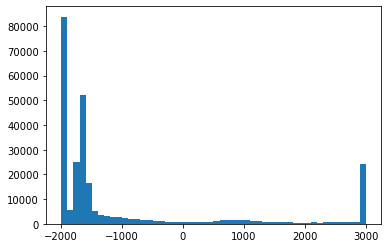

In [31]:
plt.hist(ndcm[0].flatten(),bins=50)